In [1]:
# import necessary libraries to start
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# import data (exported from 1_putting_data_together.ipynb)
data = pd.read_csv('nyc_high_schools_complete_03062016.csv', index_col=0)
data.head()

,% Female,% Male,% Poverty,2015_avg_home_value_sqft,Administrative District Code,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Average Score Regents Algebra,Average Score Regents Algebra 2/Trig,Average Score Regents Chemistry,...,Years of principal experience at this school,Zip,dropouts_percent,end_time,major_crimes,precinct,pupil_teacher_ratio,school_type,start_time,violation_offenses
DBN,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,1,2.18,2.06,64,NaN,NaN,...,3.0,10002,0.095890,3:30 PM,732,7,0.028571,NaN,8:30 AM,506
1501M448,0.378289,0.621711,0.891447,1321.166667,1,2.27,2.37,64,62,61,...,5.5,10002,0.097561,3:15 PM,732,7,NaN,NaN,8:15 AM,506
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.66,2.63,NaN,NaN,NaN,...,13.8,10009,0.034091,3:30 PM,1331,9,0.022222,Consortium School,8:30 AM,584
1501M509,0.567493,0.432507,0.845730,1321.166667,1,2.28,2.09,61,74,73,...,1.9,10002,0.176471,3:30 PM,732,7,0.025641,NaN,8:00 AM,506
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,80,80,...,9.0,10002,0.008197,4:00 PM,732,7,NaN,NaN,8:15 AM,506


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1501M292 to 1484X703
Data columns (total 61 columns):
% Female                                                          956 non-null float64
% Male                                                            956 non-null float64
% Poverty                                                         956 non-null float64
2015_avg_home_value_sqft                                          560 non-null float64
Administrative District Code                                      863 non-null float64
Average Grade 8 English Proficiency                               969 non-null float64
Average Grade 8 Math Proficiency                                  969 non-null float64
Average Score Regents Algebra                                     897 non-null float64
Average Score Regents Algebra 2/Trig                              610 non-null float64
Average Score Regents Chemistry                                   533 non-null float64
Average Score Rege

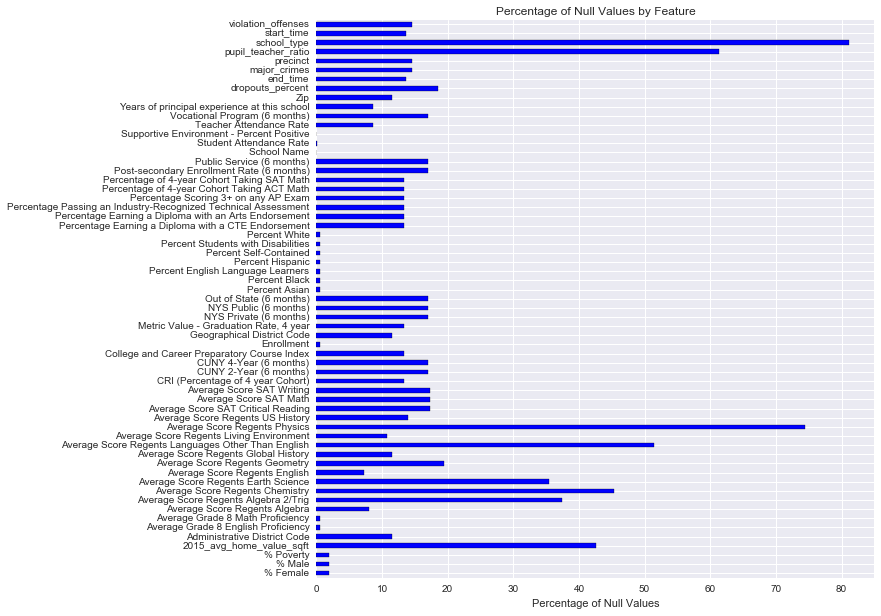

In [4]:
# view missing values
length = len(data)
missing = (data.isnull().sum() * 1.0 / length) * 100
missing.plot(kind='barh', xlim=(0,85), figsize=(10,10),)
plt.title('Percentage of Null Values by Feature')
plt.xlabel('Percentage of Null Values');

In [5]:
# tackle missing values that are greater than 50% first by dropping them
data = data.drop(['school_type', 'pupil_teacher_ratio', 'Average Score Regents Physics', 'Average Score Regents Languages Other Than English'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1501M292 to 1484X703
Data columns (total 57 columns):
% Female                                                          956 non-null float64
% Male                                                            956 non-null float64
% Poverty                                                         956 non-null float64
2015_avg_home_value_sqft                                          560 non-null float64
Administrative District Code                                      863 non-null float64
Average Grade 8 English Proficiency                               969 non-null float64
Average Grade 8 Math Proficiency                                  969 non-null float64
Average Score Regents Algebra                                     897 non-null float64
Average Score Regents Algebra 2/Trig                              610 non-null float64
Average Score Regents Chemistry                                   533 non-null float64
Average Score Rege

In [7]:
pd.set_option('display.max_columns', None)
data.corr()

,% Female,% Male,% Poverty,2015_avg_home_value_sqft,Administrative District Code,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Average Score Regents Algebra,Average Score Regents Algebra 2/Trig,Average Score Regents Chemistry,Average Score Regents Earth Science,Average Score Regents English,Average Score Regents Geometry,Average Score Regents Global History,Average Score Regents Living Environment,Average Score Regents US History,Average Score SAT Critical Reading,Average Score SAT Math,Average Score SAT Writing,CRI (Percentage of 4 year Cohort),CUNY 2-Year (6 months),CUNY 4-Year (6 months),College and Career Preparatory Course Index,Enrollment,Geographical District Code,"Metric Value - Graduation Rate, 4 year",NYS Private (6 months),NYS Public (6 months),Out of State (6 months),Percent Asian,Percent Black,Percent English Language Learners,Percent Hispanic,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percentage Earning a Diploma with a CTE Endorsement,Percentage Earning a Diploma with an Arts Endorsement,Percentage Passing an Industry-Recognized Technical Assessment,Percentage Scoring 3+ on any AP Exam,Percentage of 4-year Cohort Taking ACT Math,Percentage of 4-year Cohort Taking SAT Math,Post-secondary Enrollment Rate (6 months),Public Service (6 months),Student Attendance Rate,Supportive Environment - Percent Positive,Teacher Attendance Rate,Vocational Program (6 months),Years of principal experience at this school,Zip,dropouts_percent,major_crimes,precinct,violation_offenses
% Female,1.000000,-1.000000,-0.063817,0.209711,-0.093272,0.212558,0.136592,0.158973,0.060772,0.099588,0.138498,0.272955,0.120897,0.203815,0.179174,0.228866,0.166168,0.101317,0.215193,0.213549,0.010793,0.148012,0.122569,-0.013301,-0.095285,0.265545,0.276550,0.184161,0.206975,0.041651,-0.031504,-0.103164,-0.029316,-0.180338,-0.234677,0.073704,-0.231263,0.207879,-0.237806,0.083168,0.128258,0.297288,0.301383,-0.079436,0.143697,0.077502,0.069155,-0.096946,0.074464,-0.097436,-0.217941,-0.043766,-0.097478,-0.062791
% Male,-1.000000,1.000000,0.063824,-0.209689,0.093257,-0.212553,-0.136579,-0.158960,-0.060720,-0.099531,-0.138496,-0.272953,-0.120870,-0.203797,-0.179159,-0.228847,-0.166153,-0.101304,-0.215179,-0.213529,-0.010801,-0.148017,-0.122536,0.013307,0.095270,-0.265543,-0.276520,-0.184142,-0.206963,-0.041639,0.031459,0.103175,0.029358,0.180309,0.234665,-0.073704,0.231278,-0.207877,0.237822,-0.083155,-0.128259,-0.297288,-0.301368,0.079443,-0.143690,-0.077508,-0.069171,0.096953,-0.074457,0.097413,0.217957,0.043788,0.097467,0.062799
% Poverty,-0.063817,0.063824,1.000000,-0.219480,-0.130895,-0.707031,-0.616562,-0.429792,-0.432466,-0.488087,-0.209076,-0.550509,-0.503580,-0.552944,-0.505833,-0.479007,-0.744363,-0.676659,-0.738103,-0.604856,0.239275,-0.342964,-0.479787,-0.310615,-0.129349,-0.433887,-0.375590,-0.286828,-0.629725,-0.320656,0.066863,0.357270,0.491127,0.249893,0.294175,-0.686994,0.022818,-0.120859,0.041146,-0.437963,-0.440393,-0.364459,-0.495342,0.040486,-0.420908,-0.102544,-0.052311,0.011938,-0.045077,-0.018126,0.390800,0.137833,-0.051228,0.170291
2015_avg_home_value_sqft,0.209711,-0.209689,-0.219480,1.000000,-0.563346,0.240332,0.248254,0.182681,0.095254,0.093148,0.131699,0.228117,0.114650,0.200342,0.223887,0.211803,0.256219,0.259439,0.245029,0.287396,-0.096521,0.106470,0.242045,-0.038112,-0.564279,0.234496,0.185707,0.260758,0.337174,0.147096,-0.186146,-0.091551,0.035473,-0.226178,-0.132884,0.124257,-0.034811,0.158883,-0.034540,0.179891,0.219007,0.272221,0.249833,-0.013832,0.202166,0.142054,0.206619,0.035548,0.077856,-0.483610,-0.212895,-0.131390,-0.522360,-0.378867
Administrative District Code,-0.093272,0.093257,-0.130895,-0.563346,1.000000,0.073585,0.058381,0.045786,0.104060,0.097485,0.057456,0.069780,0.106275,0.095589,0.045727,0.052234,0.024194,0.065122,0.038683,0.040233,0.129186,0.198349,0.096642,0.245400,0.999327,0.062595,-0.053151,-0.184047,-0.134764,0.246757,0.138085,-0.045094,-0.389586,-0.0062

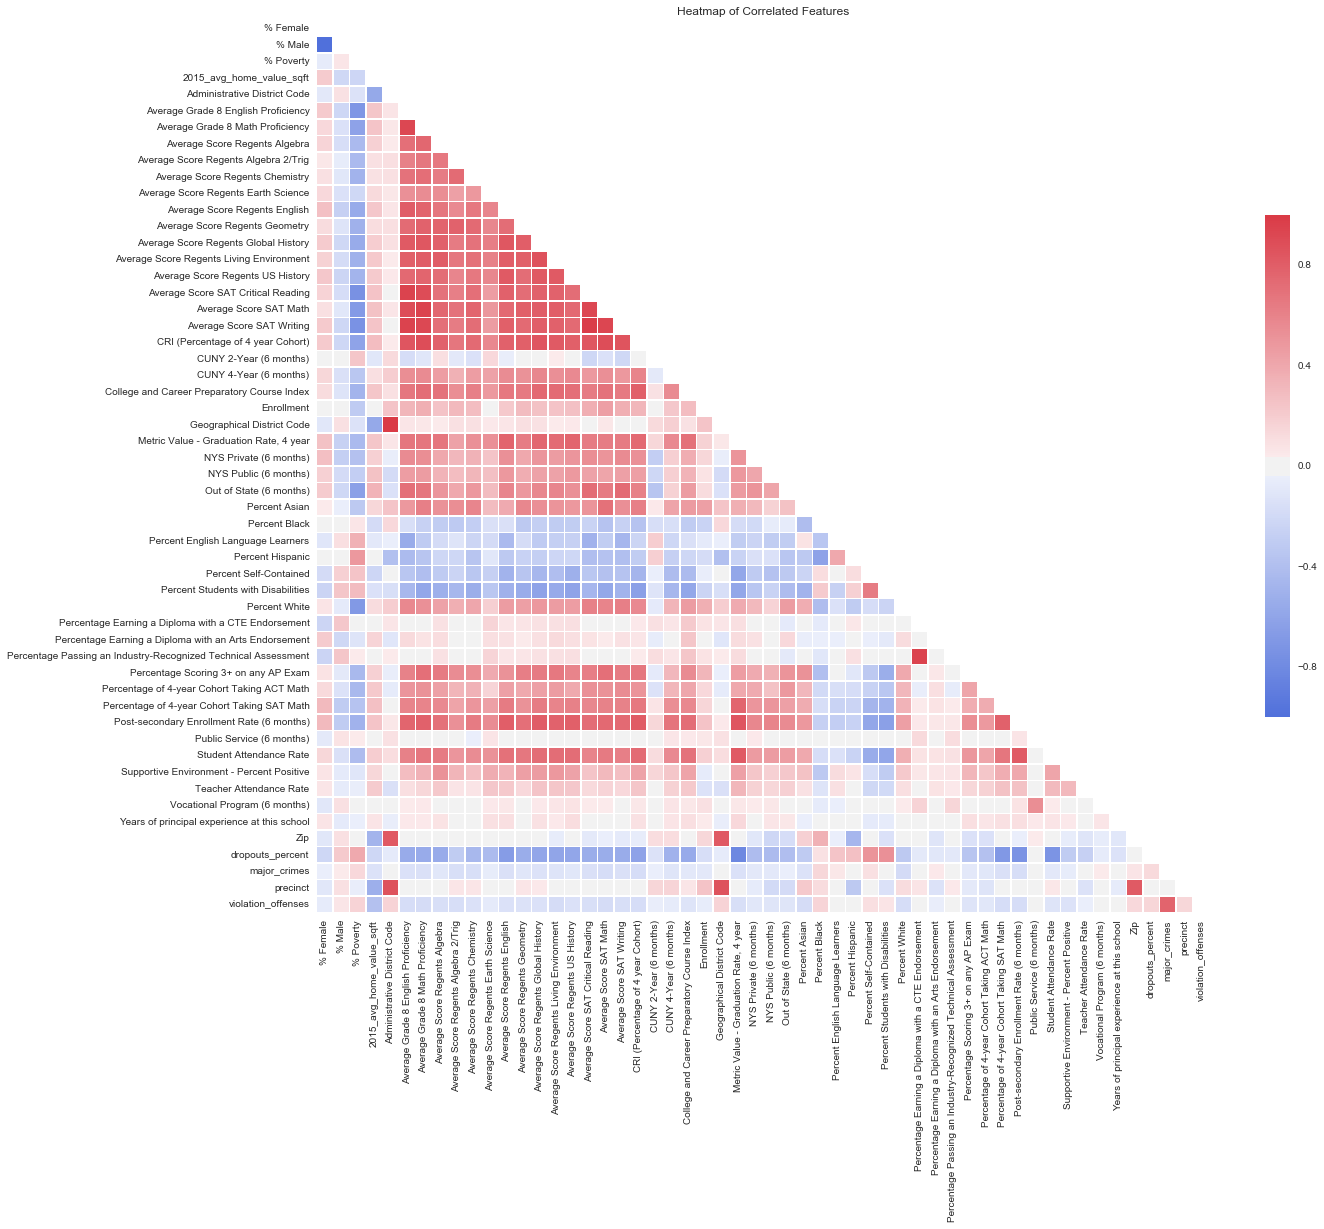

In [8]:
# look at correlated features to see if I can drop any (before I impute any missing values)
# create correlation heatmap - modified from https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Heatmap of Correlated Features')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [9]:
# I will remove 'Geographical District Code' and 'precinct' since I have 'Zip' and it is highly correlated with 'Zip' and 'Administrative District Code'
data = data.drop(['Geographical District Code', 'precinct'], axis=1)

In [10]:
# school name is useless since we have dbns as index
data = data.drop(['School Name',], axis=1)

In [11]:
# Many of the Regents exams are highly correlated and also are missing a ton of values
# I'm going to keep the top four Regents with the most values (coincidentally, across four different subjects)
# English, Algebra, Living Environments, Global History
data = data.drop(['Average Score Regents Algebra 2/Trig', 'Average Score Regents Chemistry',
                  'Average Score Regents Earth Science', 'Average Score Regents Geometry',
                 'Average Score Regents US History'], axis=1)

In [12]:
# percentage earning cte (career and technical endorsement) versus industry-recognized assesment are highly correlated
# cte is more flexible and therefore I will keep that credential
data = data.drop('Percentage Passing an Industry-Recognized Technical Assessment', axis=1)

In [13]:
# create a length of day feature
data['start_time'].head()

DBN
1501M292    8:30 AM
1501M448    8:15 AM
1501M450    8:30 AM
1501M509    8:00 AM
1501M539    8:15 AM
Name: start_time, dtype: object

In [14]:
data.loc[:, 'start_time'] = data['start_time'].str[0:-3]
data['start_time'].head()

DBN
1501M292    8:30
1501M448    8:15
1501M450    8:30
1501M509    8:00
1501M539    8:15
Name: start_time, dtype: object

In [15]:
format = '%H:%M'
data['start_time'] = pd.to_datetime(data['start_time'], format=format)

In [16]:
# checking that all of the rows in 'end_time' contain 'PM'
(data['end_time']=='AM').any()

False

In [17]:
data.loc[:, 'end_time'] = data['end_time'].str[0:-3]

In [18]:
format = '%H:%M'
data['end_time'] = pd.to_datetime(data['end_time'], format=format)

In [19]:
data['end_time'] = pd.Timedelta(hours=12) + data['end_time']

In [20]:
data['school_day_length'] = data['end_time'] - data['start_time']

In [21]:
time = pd.DatetimeIndex(data['school_day_length'])
time = time.hour * 60 + time.minute

In [22]:
data['school_day_length'] = time
data['school_day_length'].head()

DBN
1501M292    420
1501M448    420
1501M450    420
1501M509    450
1501M539    465
Name: school_day_length, dtype: float64

In [23]:
# Now I can drop start_time and end_time since I have school_day_length
data = data.drop(['start_time', 'end_time'], axis=1)

In [24]:
datac = data.copy()

In [25]:
# I have some categorical data that needs to be labeled as such
data['Zip'] = data['Zip'].astype('category')

In [26]:
data['Zip'].value_counts()

10457    26
11101    24
10002    22
10019    22
10456    22
11201    20
10468    20
10451    18
10458    18
10473    18
10011    16
11203    16
11432    16
11208    15
10023    14
10003    14
11214    14
11211    14
10463    14
11236    14
11206    12
11225    12
10029    12
11207    12
10467    12
10460    12
10461    12
10472    12
11411    11
11221    10
         ..
11224     2
11368     2
10009     2
11374     2
11385     2
11412     2
10033     2
11416     2
11223     2
11209     2
10462     2
11418     2
11102     2
11103     2
11423     2
11426     2
10453     2
10452     2
11210     2
10312     2
10302     2
11216     2
10282     2
10128     2
11218     2
11220     2
10039     2
10034     1
11419     1
11420     1
dtype: int64

In [27]:
data['Administrative District Code'] = data['Administrative District Code'].astype('category')
data['Administrative District Code'].value_counts()

2     116
10     54
9      46
8      38
17     34
11     34
7      32
12     32
28     30
24     30
14     30
19     27
13     26
3      26
27     26
29     25
18     22
21     22
15     22
5      20
31     20
25     20
30     20
6      19
4      14
32     14
1      12
22     12
26     11
16     11
20     10
23      8
dtype: int64

In [28]:
# impute missing values with feature median
for x in data.columns:
    if x=='Zip' or x=='Administrative District Code':
        data[x].fillna(value=data[x].value_counts().index[0])
    else:
        data[x].fillna((data[x].median()), inplace=True)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 975 entries, 1501M292 to 1484X703
Data columns (total 47 columns):
% Female                                                 975 non-null float64
% Male                                                   975 non-null float64
% Poverty                                                975 non-null float64
2015_avg_home_value_sqft                                 975 non-null float64
Administrative District Code                             863 non-null category
Average Grade 8 English Proficiency                      975 non-null float64
Average Grade 8 Math Proficiency                         975 non-null float64
Average Score Regents Algebra                            975 non-null float64
Average Score Regents English                            975 non-null float64
Average Score Regents Global History                     975 non-null float64
Average Score Regents Living Environment                 975 non-null float64
Average Score SAT Critical Re

In [30]:
data.describe()

,% Female,% Male,% Poverty,2015_avg_home_value_sqft,Average Grade 8 English Proficiency,Average Grade 8 Math Proficiency,Average Score Regents Algebra,Average Score Regents English,Average Score Regents Global History,Average Score Regents Living Environment,Average Score SAT Critical Reading,Average Score SAT Math,Average Score SAT Writing,CRI (Percentage of 4 year Cohort),CUNY 2-Year (6 months),CUNY 4-Year (6 months),College and Career Preparatory Course Index,Enrollment,"Metric Value - Graduation Rate, 4 year",NYS Private (6 months),NYS Public (6 months),Out of State (6 months),Percent Asian,Percent Black,Percent English Language Learners,Percent Hispanic,Percent Self-Contained,Percent Students with Disabilities,Percent White,Percentage Earning a Diploma with a CTE Endorsement,Percentage Earning a Diploma with an Arts Endorsement,Percentage Scoring 3+ on any AP Exam,Percentage of 4-year Cohort Taking ACT Math,Percentage of 4-year Cohort Taking SAT Math,Post-secondary Enrollment Rate (6 months),Public Service (6 months),Student Attendance Rate,Supportive Environment - Percent Positive,Teacher Attendance Rate,Vocational Program (6 months),Years of principal experience at this school,dropouts_percent,major_crimes,violation_offenses,school_day_length
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,0.491780,0.508215,0.806972,478.612137,2.426923,2.346013,66.245128,71.905641,65.272821,68.631795,418.854872,425.657436,412.726154,0.290482,0.170895,0.140002,0.415893,643.160000,0.733475,0.072263,0.087678,0.047212,0.090902,0.373058,0.124630,0.442199,0.053180,0.188185,0.076325,0.027720,0.025815,0.104717,0.084327,0.625680,0.536442,0.000273,0.869470,0.841588,0.965518,0.000069,4.882359,0.088694,1569.858462,900.549744,421.841026
std,0.139324,0.139321,0.156481,316.081895,0.380232,0.389465,6.185564,7.484366,9.368753,7.801491,54.681678,64.338344,57.564551,0.232938,0.089390,0.099359,0.268438,735.987919,0.160871,0.060331,0.061341,0.063481,0.134791,0.254595,0.186013,0.242252,0.056152,0.085164,0.124313,0.115514,0.126932,0.165134,0.124683,0.201825,0.187358,0.002633,0.064332,0.057396,0.010711,0.000816,3.454512,0.074756,602.901394,356.810036,28.397811
min,0.000000,0.000000,0.141361,154.416667,1.698000,1.860000,52.000000,48.000000,42.000000,49.000000,302.000000,317.000000,284.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.091000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,0.610000,0.883000,0.000000,0.100000,0.000000,378.000000,257.000000,355.000000
25%,0.435556,0.453335,0.744794,348.416667,2.210000,2.095054,62.000000,67.000000,58.000000,64.000000,390.500000,389.000000,383.000000,0.125000,0.119500,0.076000,0.209000,322.500000,0.636000,0.034000,0.046000,0.015000,0.012000,0.195265,0.027477,0.216000,0.006000,0.138661,0.011000,0.000000,0.000000,0.007000,0.011000,0.506500,0.406500,0.000000,0.826000,0.801000,0.960000,0.000000,2.300000,0.037826,1148.000000,681.000000,405.000000
50%,0.490625,0.509375,0.829295,391.916667,2.340000,2.220000,65.000000,71.000000,64.000000,67.000000,409.500000,410.000000,402.000000,0.221000,0.164000,0.122000,0.365000,426.000000,0.738000,0.058000,0.075000,0.029000,0.035000,0.303000,0.067961,0.457317,0.036000,0.193000,0.023000,0.000000,0.000000,0.045000,0.040000,0.632000,0.514000,0.000000,0.878000,0.840000,0.966000,0.000000,3.900000,0.075228,1500.000000,855.000000,420.000000
75%,0.546665,0.564444,0.908691,444.083333,2.562491,2.459429,69.000000,76.000000,70.000000

In [31]:
# check for feature variance
data.var().sort_values()

Vocational Program (6 months)                            6.657042e-07
Public Service (6 months)                                6.933706e-06
Teacher Attendance Rate                                  1.147325e-04
Percent Self-Contained                                   3.153054e-03
Supportive Environment - Percent Positive                3.294271e-03
NYS Private (6 months)                                   3.639834e-03
NYS Public (6 months)                                    3.762726e-03
Out of State (6 months)                                  4.029853e-03
Student Attendance Rate                                  4.138644e-03
dropouts_percent                                         5.588477e-03
Percent Students with Disabilities                       7.252981e-03
CUNY 2-Year (6 months)                                   7.990578e-03
CUNY 4-Year (6 months)                                   9.872162e-03
Percentage Earning a Diploma with a CTE Endorsement      1.334358e-02
Percent White       

In [32]:
# Based on the above, will remove extremely low variance features (they do not contain much information)
data = data.drop(['Vocational Program (6 months)', 'Public Service (6 months)'], axis=1)

In [33]:
# create an 'sat_overall' feature to capture SAT scores
data['sat_score_overall'] = data['Average Score SAT Critical Reading'] + data['Average Score SAT Math'] + data['Average Score SAT Writing']

In [34]:
# create a 'regents_overall' feature to capture Regents scores
data['regents_score_overall'] = data['Average Score Regents Algebra'] + data['Average Score Regents English'] + data['Average Score Regents Living Environment'] + data['Average Score Regents Global History']

In [35]:
# create a diversity feature from sum of squares // 1 = least diverse and lower numbers = more diverse
data['population_diversity'] = (data['Percent Black']**2 + data['Percent White']**2 + data['Percent Hispanic']**2 + data['Percent Asian']**2)

In [36]:
# create a grade 8 score rating
data['grade8_proficiency'] = data['Average Grade 8 English Proficiency'] + data['Average Grade 8 Math Proficiency']

In [37]:
# combine crime features
data['all_crime'] = data['major_crimes'] + data['violation_offenses']

In [38]:
# rename columns to tidier names
data = data.rename(columns=({ 'Teacher Attendance Rate' : 'teacher_attendance', 'Percent Self-Contained': 'self-contained_percent',
                            'Supportive Environment - Percent Positive' : 'school_environment_survey', 'NYS Private (6 months)': 'college_nys_private',
                            'NYS Public (6 months)' : 'college_nys_public', 'Out of State (6 months)': 'college_out_of_state',
                            'Student Attendance Rate' : 'student_attendance_rate', 'Percent Students with Disabilities': 'disability_percent',
                            'CUNY 2-Year (6 months)' : 'cuny_2yr', 'CUNY 4-Year (6 months)': 'cuny_4yr',
                            'Percentage Earning a Diploma with a CTE Endorsement' : 'cte_percent', 'Percent White': 'white_percent',
                            'Percentage of 4-year Cohort Taking ACT Math' : 'act_percent_took_exam', 'Percentage Earning a Diploma with an Arts Endorsement': 'arts_percent',
                            'Percent Asian' : 'asian_percent', '% Male': 'male_percent',
                            '% Female' : 'female_percent', '% Poverty': 'poverty_percent',
                            'Metric Value - Graduation Rate, 4 year' : 'graduation_rate', 'Percent English Language Learners': 'ell_percent',
                            'Post-secondary Enrollment Rate (6 months)' : 'post-secondary_enroll_rate', 'Percentage of 4-year Cohort Taking SAT Math': 'sat_percent_took_exam',
                            'CRI (Percentage of 4 year Cohort)' : 'college_readiness_index', 'Percent Hispanic': 'hispanic_percent',
                            'Percent Black' : 'percent_black', 'College and Career Preparatory Course Index': 'college_career_readiness_index',
                            'Average Grade 8 English Proficiency' : 'grade8_english', 'Average Grade 8 Math Proficiency': 'grade8_math',
                            'Years of principal experience at this school' : 'principal_year_exp', 'Average Score Regents Algebra': 'regents_algebra',
                            'Average Score Regents English' : 'regents_english', 'Average Score Regents Living Environment': 'regents_living_environ',
                            'Administrative District Code' : 'district_admin_code', 'Average Score Regents Global History': 'regents_history_global',
                            'Average Score SAT Critical Reading' : 'sat_reading', 'Average Score SAT Writing': 'sat_writing',
                            'Average Score SAT Math' : 'sat_math', 'Zip': 'zip_code',
                            'Enrollment' : 'enrollment', '2015_avg_home_value_sqft': 'avg_home_value_sqft',
                            'Percentage Scoring 3+ on any AP Exam':'ap_exams_percent_scoring_3plus'}))

data.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,percent_black,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,1,2.18,2.06,64,66,53,55,406,410,381,0.389,0.131,0.066,0.333,255,0.639,0.000,0.049,0.016,0.132,0.244,0.127,0.566,0.015,0.298,0.039,0,0,0.014,0.000,0.597,0.262,0.766,0.77,0.971,3.0,10002,0.095890,732,506,420,1197,238,0.398837,4.24,1238
1501M448,0.378289,0.621711,0.891447,1321.166667,1,2.27,2.37,64,69,67,68,355,437,352,0.229,0.197,0.169,0.675,304,0.843,0.042,0.000,0.014,0.299,0.250,0.194,0.411,0.003,0.220,0.033,0,0,0.410,0.133,0.699,0.507,0.880,0.87,0.971,5.5,10002,0.097561,732,506,420,1144,268,0.321911,4.64,1238
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.66,2.63,65,75,64,67,428,454,445,0.580,0.111,0.144,0.386,666,0.864,0.189,0.156,0.100,0.094,0.221,0.018,0.579,0.000,0.234,0.083,0,0,0.057,0.216,0.852,0.722,0.938,0.92,0.961,13.8,10009,0.034091,1331,584,420,1327,271,0.399807,5.29,1915
1501M509,0.567493,0.432507,0.845730,1321.166667,1,2.28,2.09,61,69,63,64,413,438,394,0.119,0.100,0.083,0.208,363,0.475,0.017,0.067,0.017,0.058,0.399,0.091,0.512,0.146,0.284,0.025,0,0,0.020,0.040,0.356,0.300,0.768,0.81,0.971,1.9,10002,0.176471,732,506,450,1245,257,0.425334,4.37,1238
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,91,87,88,601,657,601,0.967,0.044,0.168,0.992,1735,0.975,0.248,0.159,0.195,0.385,0.133,0.002,0.180,0.000,0.043,0.286,0,0,0.811,0.262,0.910,0.823,0.952,0.85,0.967,9.0,10002,0.008197,732,506,465,1859,346,0.280110,7.03,1238


In [39]:
# made one mistake
data = data.rename(columns=({ 'percent_black': 'black_percent'}))

data.head()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1501M292,0.376471,0.623529,0.866667,1321.166667,1,2.18,2.06,64,66,53,55,406,410,381,0.389,0.131,0.066,0.333,255,0.639,0.000,0.049,0.016,0.132,0.244,0.127,0.566,0.015,0.298,0.039,0,0,0.014,0.000,0.597,0.262,0.766,0.77,0.971,3.0,10002,0.095890,732,506,420,1197,238,0.398837,4.24,1238
1501M448,0.378289,0.621711,0.891447,1321.166667,1,2.27,2.37,64,69,67,68,355,437,352,0.229,0.197,0.169,0.675,304,0.843,0.042,0.000,0.014,0.299,0.250,0.194,0.411,0.003,0.220,0.033,0,0,0.410,0.133,0.699,0.507,0.880,0.87,0.971,5.5,10002,0.097561,732,506,420,1144,268,0.321911,4.64,1238
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.66,2.63,65,75,64,67,428,454,445,0.580,0.111,0.144,0.386,666,0.864,0.189,0.156,0.100,0.094,0.221,0.018,0.579,0.000,0.234,0.083,0,0,0.057,0.216,0.852,0.722,0.938,0.92,0.961,13.8,10009,0.034091,1331,584,420,1327,271,0.399807,5.29,1915
1501M509,0.567493,0.432507,0.845730,1321.166667,1,2.28,2.09,61,69,63,64,413,438,394,0.119,0.100,0.083,0.208,363,0.475,0.017,0.067,0.017,0.058,0.399,0.091,0.512,0.146,0.284,0.025,0,0,0.020,0.040,0.356,0.300,0.768,0.81,0.971,1.9,10002,0.176471,732,506,450,1245,257,0.425334,4.37,1238
1501M539,0.515274,0.484726,0.273199,1321.166667,1,3.50,3.53,80,91,87,88,601,657,601,0.967,0.044,0.168,0.992,1735,0.975,0.248,0.159,0.195,0.385,0.133,0.002,0.180,0.000,0.043,0.286,0,0,0.811,0.262,0.910,0.823,0.952,0.85,0.967,9.0,10002,0.008197,732,506,465,1859,346,0.280110,7.03,1238


In [40]:
pd.set_option('display.max_columns', None)
data.corr()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime
female_percent,1.000000,-1.000000,-0.063828,0.169150,0.211686,0.136068,0.155758,0.261099,0.197213,0.174555,0.155383,0.101914,0.198973,0.204338,0.013715,0.137877,0.118787,-0.013142,0.236523,0.248514,0.167526,0.191854,0.041537,-0.031323,-0.102925,-0.029155,-0.174831,-0.231392,0.073586,-0.199582,0.197940,0.089899,0.130713,0.264972,0.264758,0.137539,0.076257,0.067622,0.073190,-0.174942,-0.041273,-0.059593,-0.161295,0.152775,0.219466,-0.076621,0.176779,-0.050920
male_percent,-1.000000,1.000000,0.063834,-0.169137,-0.211682,-0.136056,-0.155745,-0.261097,-0.197195,-0.174540,-0.155370,-0.101904,-0.198961,-0.204322,-0.013724,-0.137883,-0.118759,0.013147,-0.236520,-0.248487,-0.167511,-0.191844,-0.041526,0.031278,0.102936,0.029196,0.174804,0.231381,-0.073587,0.199593,-0.197939,-0.089889,-0.130715,-0.264970,-0.264744,-0.137533,-0.076262,-0.067639,-0.073184,0.174954,0.041294,0.059600,0.161317,-0.152763,-0.219452,0.076590,-0.176770,0.050936
poverty_percent,-0.063828,0.063834,1.000000,-0.187832,-0.705396,-0.615376,-0.399013,-0.519286,-0.505988,-0.450183,-0.677039,-0.615210,-0.670950,-0.550240,0.210754,-0.310514,-0.438208,-0.310961,-0.391834,-0.334151,-0.255490,-0.560523,-0.320226,0.066620,0.356205,0.488328,0.245636,0.292417,-0.686265,0.017501,-0.113815,-0.399209,-0.403837,-0.329546,-0.439283,-0.405034,-0.099596,-0.052185,-0.040095,0.325009,0.129940,0.160465,0.074234,-0.664103,-0.523219,0.333155,-0.672611,0.149621
avg_home_value_sqft,0.169150,-0.169137,-0.187832,1.000000,0.189562,0.177749,0.107884,0.166802,0.119642,0.121587,0.188834,0.194858,0.179620,0.213965,-0.066718,0.112361,0.175655,0.001380,0.164581,0.116155,0.145744,0.213257,0.170723,-0.103981,-0.076814,-0.070971,-0.157085,-0.104019,0.143203,-0.040205,0.094702,0.111318,0.142598,0.188509,0.179983,0.132958,0.082948,0.154914,0.064700,-0.156949,-0.101791,-0.291253,-0.049417,0.191361,0.142746,-0.226825,0.187136,-0.182387
grade8_english,0.211686,-0.211682,-0.705396,0.189562,1.000000,0.924797,0.657888,0.785931,0.780576,0.724741,0.907217,0.850110,0.904410,0.813066,-0.160199,0.512964,0.645403,0.325127,0.655098,0.524837,0.427279,0.662207,0.490004,-0.154907,-0.539692,-0.427004,-0.346434,-0.451207,0.572000,0.029478,0.126758,0.580588,0.488230,0.572163,0.721079,0.607459,0.278810,0.105801,0.044222,-0.527636,-0.130050,-0.154069,-0.061271,0.901204,0.820929,-0.354233,0.980557,-0.147175
grade8_math,0.136068,-0.136056,-0.615376,0.177749,0.924797,1.000000,0.694412,0.745347,0.805976,0.744688,0.849785,0.889719,0.860120,0.847035,-0.097947,0.530040,0.689726,0.360074,0.647571,0.499831,0.426803,0.622518,0.620915,-0.262405,-0.310413,-0.357271,-0.401542,-0.583369,0.526770,0.033082,0.076069,0.667038,0.495593,0.572231,0.740512,0.663235,0.342930,0.139226,0.042495,-0.512884,-0.132533,-0.164386,-0.033362,0.883097,0.832239,-0.290721,0.981476,-0.152889
regents_algebra,0.155758,-0.155745,-0.399013,0.107884,0.657888,0.694412,1.000000,0.623768,0.739380,0.779457,0.598201,0.658012,0.608839,0.690506,0.097790,0.413934,0.608469,0.258148,0.609504,0.354904,0.296211,0.438502,0.481268,-0.275982,-0.172674,-0.202369,-0.283975,-0.462856,0.407191,0.084465,0.106749,0.582748,0.402809,0.505264,0.614372,0.59017

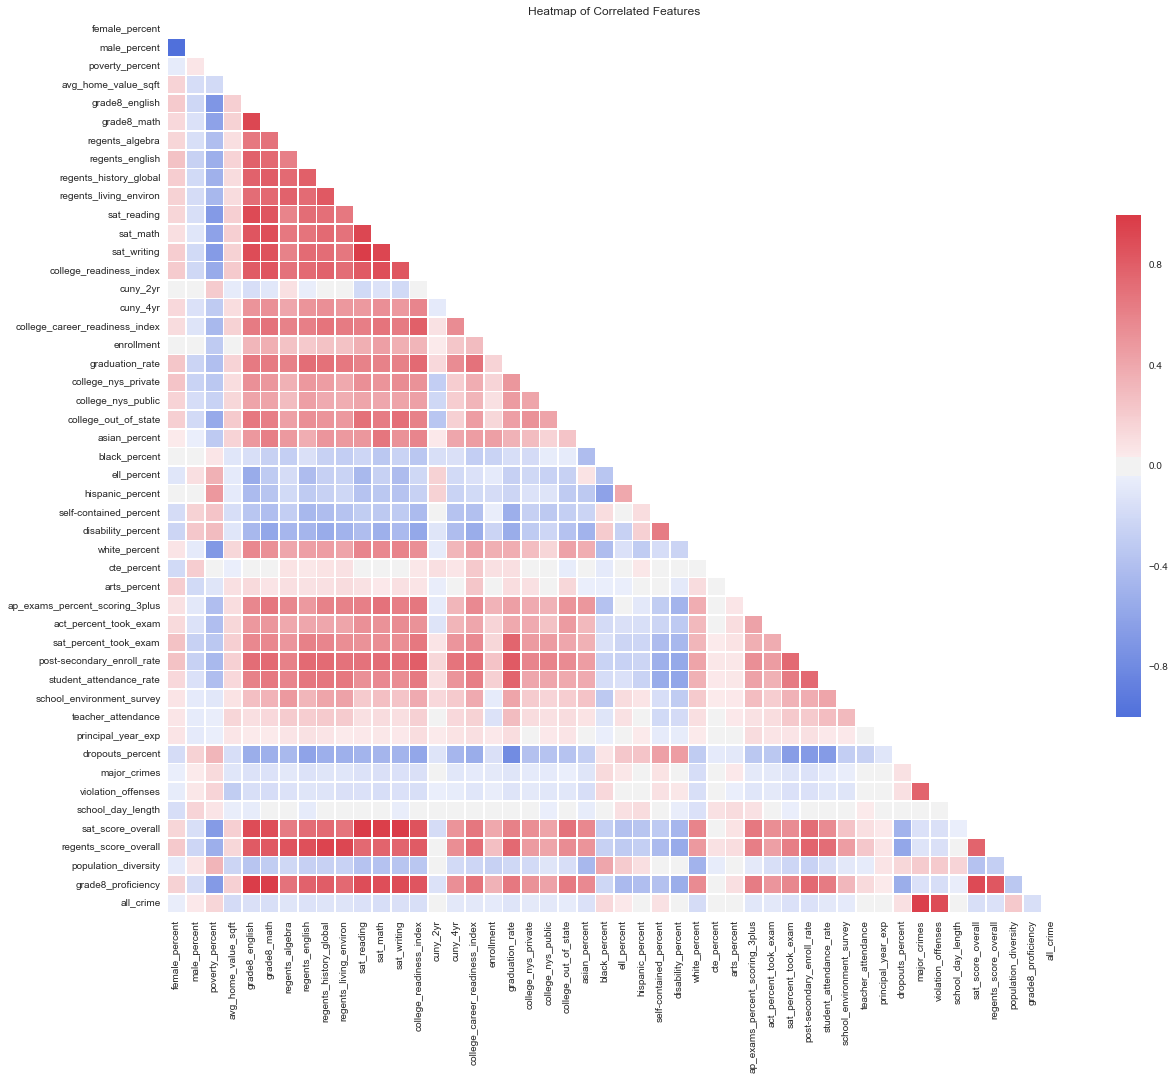

In [41]:
# one more time
# create correlation heatmap - modified from https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
plt.title('Heatmap of Correlated Features')
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

In [42]:
pd.set_option('display.max_columns', None)
data.describe()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime
count,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000,975.000000
mean,0.491780,0.508215,0.806972,478.612137,2.426923,2.346013,66.245128,71.905641,65.272821,68.631795,418.854872,425.657436,412.726154,0.290482,0.170895,0.140002,0.415893,643.160000,0.733475,0.072263,0.087678,0.047212,0.090902,0.373058,0.124630,0.442199,0.053180,0.188185,0.076325,0.027720,0.025815,0.104717,0.084327,0.625680,0.536442,0.869470,0.841588,0.965518,4.882359,0.088694,1569.858462,900.549744,421.841026,1257.238462,272.055385,0.505767,4.772936,2470.408205
std,0.139324,0.139321,0.156481,316.081895,0.380232,0.389465,6.185564,7.484366,9.368753,7.801491,54.681678,64.338344,57.564551,0.232938,0.089390,0.099359,0.268438,735.987919,0.160871,0.060331,0.061341,0.063481,0.134791,0.254595,0.186013,0.242252,0.056152,0.085164,0.124313,0.115514,0.126932,0.165134,0.124683,0.201825,0.187358,0.064332,0.057396,0.010711,3.454512,0.074756,602.901394,356.810036,28.397811,173.506483,27.917983,0.161500,0.755089,906.270336
min,0.000000,0.000000,0.141361,154.416667,1.698000,1.860000,52.000000,48.000000,42.000000,49.000000,302.000000,317.000000,284.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.091000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,0.610000,0.883000,0.100000,0.000000,378.000000,257.000000,355.000000,919.000000,213.000000,0.173010,3.600811,877.000000
25%,0.435556,0.453335,0.744794,348.416667,2.210000,2.095054,62.000000,67.000000,58.000000,64.000000,390.500000,389.000000,383.000000,0.125000,0.119500,0.076000,0.209000,322.500000,0.636000,0.034000,0.046000,0.015000,0.012000,0.195265,0.027477,0.216000,0.006000,0.138661,0.011000,0.000000,0.000000,0.007000,0.011000,0.506500,0.406500,0.826000,0.801000,0.960000,2.300000,0.037826,1148.000000,681.000000,405.000000,1160.000000,253.000000,0.384174,4.300000,1899.000000
50%,0.490625,0.509375,0.829295,391.916667,2.340000,2.220000,65.000000,71.000000,64.000000,67.000000,409.500000,410.000000,402.000000,0.221000,0.164000,0.122000,0.365000,426.000000,0.738000,0.058000,0.075000,0.029000,0.035000,0.303000,0.067961,0.457317,0.036000,0.193000,0.023000,0.000000,0.000000,0.045000,0.040000,0.632000,0.514000,0.878000,0.840000,0.966000,3.900000,0.075228,1500.000000,855.000000,420.000000,1221.500000,267.000000,0.485865,4.541686,2355.000000
75%,0.546665,0.564444,0.908691,444.083333,2.562491,2.459429,69.000000,76.000000,70.000000,73.000000,432.000000,442.500000,425.000000,0.372000,0.209500,0.173500,0.582500,593.500000,0.851000,0.089500,0.112000,0.048000,0.096225,0.521869,0.134500,0.637000,0.086021,0.241794,0.078523,0.000000,0.000000,0.123000,0.

In [43]:
data.shape

(975, 50)

In [44]:
data.corr().sort_values(by='graduation_rate', ascending=False)['graduation_rate']

graduation_rate                   1.000000
post-secondary_enroll_rate        0.825262
student_attendance_rate           0.773127
sat_percent_took_exam             0.758937
regents_score_overall             0.749269
college_readiness_index           0.740538
regents_english                   0.726092
regents_history_global            0.698203
college_career_readiness_index    0.692712
grade8_proficiency                0.663889
regents_living_environ            0.662992
grade8_english                    0.655098
grade8_math                       0.647571
sat_score_overall                 0.616349
sat_writing                       0.611327
regents_algebra                   0.609504
sat_math                          0.603188
sat_reading                       0.602424
cuny_4yr                          0.547968
college_nys_private               0.493381
college_nys_public                0.470502
ap_exams_percent_scoring_3plus    0.452227
college_out_of_state              0.450399
school_envi

In [45]:
data.corr().sort_values(by='college_readiness_index', ascending=False)['college_readiness_index']

college_readiness_index           1.000000
sat_math                          0.884133
sat_score_overall                 0.866847
grade8_math                       0.847035
grade8_proficiency                0.846316
sat_writing                       0.840795
sat_reading                       0.825137
regents_score_overall             0.814927
grade8_english                    0.813066
post-secondary_enroll_rate        0.801967
college_career_readiness_index    0.792754
regents_history_global            0.780840
graduation_rate                   0.740538
regents_english                   0.737595
regents_living_environ            0.723454
regents_algebra                   0.690506
ap_exams_percent_scoring_3plus    0.670397
sat_percent_took_exam             0.657024
student_attendance_rate           0.654453
college_out_of_state              0.605999
asian_percent                     0.593281
cuny_4yr                          0.587110
white_percent                     0.536726
college_nys

In [46]:
data['graduation_rate'].mean()

0.7334748717948746

In [47]:
data['college_readiness_index'].mean()

0.29048205128205157

In [48]:
# school graduating college-ready students at the same rate as their grad rate (within a small margin) -- NOT ENOUGH SCHOOLS
data[data['college_readiness_index']>=(data['graduation_rate']-.2)].sort_values(by='college_readiness_index')

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1414K322,0.409091,0.590909,0.881818,391.916667,14,2.114157,2.017356,57,55,47,55,409.5,410,402,0.000,0.000,0.032,0.000,110,0.200,0.065,0.000,0.000,0.018182,0.627273,0.063636,0.318182,0.218182,0.400000,0.009091,0.000,0.000,0.000,0.000,0.160,0.097,0.721,0.729,0.964,0.1,11206,0.304348,1738,1111,420,1221.5,214,0.495124,4.131513,2849
1484M522,0.473881,0.526119,0.876866,391.916667,NaN,2.227531,2.025667,62,64,64,69,409.5,410,402,0.030,0.000,0.000,0.000,268,0.091,0.000,0.000,0.000,0.011194,0.626866,0.037313,0.320896,0.208955,0.361940,0.018657,0.000,0.000,0.000,0.000,0.061,0.000,0.745,0.797,0.966,3.9,NaN,0.075228,1500,855,420,1221.5,259,0.496409,4.253198,2355
1409X414,0.413655,0.586345,1.000000,194.416667,9,2.139509,2.035799,58,57,55,53,369.0,353,363,0.050,0.026,0.036,0.010,249,0.180,0.036,0.054,0.018,0.016064,0.228916,0.397590,0.746988,0.160643,0.253012,0.008032,0.000,0.000,0.000,0.000,0.280,0.170,0.748,0.796,0.947,12.0,10457,0.204082,1500,855,420,1085.0,223,0.610716,4.175308,2355
1509X412,0.421829,0.578171,1.000000,211.416667,9,2.070000,2.010000,64,60,58,61,360.0,365,346,0.194,0.224,0.037,0.194,339,0.387,0.019,0.075,0.009,0.015000,0.333000,0.298000,0.631000,0.091000,0.263000,0.012000,0.000,0.000,0.000,0.011,0.333,0.374,0.789,0.780,0.962,3.3,10457,0.144444,973,525,450,1071.0,243,0.509419,4.080000,1498
1510X524,0.497024,0.502976,1.000000,391.916667,10,1.730000,1.930000,55,48,64,67,409.5,410,402,0.300,0.164,0.122,0.320,336,0.450,0.058,0.075,0.029,0.018000,0.104000,0.872000,0.857000,0.012000,0.048000,0.018000,0.000,0.000,0.030,0.000,0.000,0.514,0.878,0.830,0.963,4.0,10458,0.240000,2035,1159,465,1221.5,234,0.745913,3.660000,3194
1584M350,0.522388,0.477612,0.696065,391.916667,NaN,2.710000,2.810000,70,81,81,84,467.0,505,497,0.541,0.000,0.127,0.918,737,0.694,0.055,0.036,0.436,0.010000,0.697000,0.015000,0.260000,0.003000,0.099000,0.008000,0.000,0.000,0.271,0.894,0.776,0.655,0.963,0.860,0.966,3.9,NaN,0.075228,1500,855,420,1469.0,316,0.553573,5.520000,2355
1402M459,0.522659,0.477341,1.000000,391.916667,2,1.901176,2.385359,65,73,64,67,386.0,490,399,0.545,0.296,0.141,0.273,331,0.712,0.028,0.042,0.014,0.350453,0.163142,0.773414,0.350453,0.006042,0.036254,0.129909,0.000,0.000,0.136,0.000,0.636,0.521,0.924,0.935,0.962,1.8,10065,0.060606,2064,531,390,1275.0,269,0.289126,4.286535,2595
1517K122,0.296804,0.703196,0.682648,444.083333,17,2.490000,2.310000,67,69,60,59,442.0,446,410,0.653,0.164,0.122,0.837,438,0.724,0.058,0.075,0.029,0.030000,0.856000,0.021000,0.091000,0.005000,0.155000,0.007000,0.000,0.000,0.000,0.000,0.694,0.514,0.922,0.830,0.983,4.0,11213,0.000000,2322,1673,495,1298.0,255,0.741966,4.800000,3995
1484M350,0.548476,0.451524,0.588643,391.916667,NaN,2.618870,2.668145,80,78,80,81,477.0,525,513,0.655,0.036,0.179,0.891,375,0.727,0.089,0.107,0.143,0.008000,0.698667,0.016000,0.266667,0.010667,0.173333,0.005333,0.000,0.000,0.236,0.818,0.855,0.554,0.964,0.912,0.966,3.9,NaN,0.075228,1500,855,420,1515.0,319,0.559339,5.287015,2355


In [49]:
# schools that are graduating college-ready students at the same rate (or greater than) the average NYC graduation rate (NOT ENOUGH SCHOOLS)
data[data['college_readiness_index']>=(data['graduation_rate'].mean())].sort_values(by='college_readiness_index')

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1521K468,0.453901,0.546099,0.748227,452.083333,21,2.800000,2.760000,70,80,76,77,462.0,474,449,0.734,0.173,0.480,0.987,564,0.937,0.027,0.053,0.040,0.066000,0.257000,0.009000,0.243000,0.000000,0.145000,0.425000,0.000,0.000,0.000,0.025,0.658,0.813,0.913,0.770,0.967,9.0,11214,0.012658,1510,1080,380,1385.0,303,0.310079,5.560000,2590
1522K405,0.555585,0.444415,0.529443,392.500000,22,3.060000,3.050000,71,81,74,76,514.0,550,516,0.741,0.103,0.391,0.835,3787,0.910,0.094,0.136,0.069,0.337000,0.298000,0.033000,0.125000,0.015000,0.067000,0.233000,0.000,0.000,0.382,0.158,0.857,0.797,0.939,0.860,0.960,2.0,11210,0.019826,1110,626,405,1580.0,302,0.272287,6.110000,1736
1409X260,0.518438,0.481562,0.843818,196.500000,9,2.765701,2.636493,78,74,73,79,470.0,520,472,0.743,0.186,0.304,0.615,461,0.881,0.147,0.098,0.098,0.054230,0.255965,0.039046,0.670282,0.067245,0.190889,0.015184,0.000,0.000,0.294,0.202,0.798,0.833,0.908,0.922,0.972,9.0,10456,0.027523,1335,923,450,1462.0,304,0.517967,5.402194,2258
1404M435,0.491814,0.508186,0.832494,850.750000,4,3.029177,3.169750,81,81,76,80,483.0,542,474,0.746,0.257,0.193,0.840,1588,0.936,0.135,0.099,0.083,0.193955,0.193955,0.039673,0.573048,0.009446,0.076196,0.028967,0.000,0.000,0.402,0.196,0.863,0.767,0.922,0.858,0.973,7.0,10029,0.020356,1111,749,385,1499.0,318,0.404460,6.198927,1860
1502M376,0.576923,0.423077,0.443439,391.916667,2,3.120000,2.810000,70,86,79,77,515.0,518,503,0.750,0.071,0.224,0.470,442,0.990,0.184,0.112,0.214,0.086000,0.199000,0.002000,0.398000,0.007000,0.129000,0.287000,0.000,0.000,0.410,0.290,0.960,0.806,0.940,0.920,0.980,2.8,10013,0.000000,2061,692,420,1536.0,312,0.287770,5.930000,2753
1524Q264,0.518828,0.481172,0.805439,391.916667,24,2.700000,2.720000,71,84,80,77,456.0,489,459,0.756,0.129,0.310,0.862,478,0.943,0.181,0.060,0.060,0.220000,0.071000,0.046000,0.519000,0.004000,0.109000,0.153000,0.000,0.000,0.276,0.024,0.927,0.741,0.928,0.870,0.974,3.0,11101,0.000000,555,487,420,1404.0,312,0.346211,5.420000,1042
1402M414,0.573593,0.426407,0.755411,391.916667,2,3.177300,3.108782,80,84,90,84,483.0,526,486,0.758,0.232,0.192,0.616,462,0.970,0.168,0.152,0.064,0.311688,0.132035,0.010823,0.413420,0.000000,0.097403,0.138528,0.000,0.000,0.253,0.101,0.949,0.808,0.945,0.851,0.965,9.0,10011,0.000000,1123,437,390,1495.0,338,0.304689,6.286082,1560
1504M555,0.663090,0.336910,0.892704,926.416667,4,2.710000,2.590000,74,81,77,81,468.0,483,439,0.760,0.149,0.381,0.771,466,0.979,0.090,0.209,0.052,0.073000,0.245000,0.030000,0.633000,0.004000,0.137000,0.039000,0.000,0.000,0.271,0.031,0.979,0.896,0.943,0.910,0.981,10.0,10029,0.010417,996,971,410,1390.0,313,0.467564,5.300000,1967
1504M610,1.000000,0.000000,0.806250,926.416667,4,2.850000,2.800000,72,87,83,78,465.0,478,472,0.761,0.108,0.169,0.549,480,0.986,0.231,0.200,0.231,0.089000,0.279000,0.009000,0.574000,0.000000,0.175000,0.034000,0.000,0.000,0.324,0.155,1.000,0.938,0.948,0.870,0.965,8.0,10029,0.000000,996,971,390,1415.0,320,0.416394,5.650000,1967


In [50]:
# schools that are graduating college-ready students at the same rate as (or greater than) the NYC average graduation rate (within one standard deviation to add more leeway)
data[data['college_readiness_index']>=(data['graduation_rate'].mean()-data['graduation_rate'].std())].sort_values(by='college_readiness_index')

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,district_admin_code,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,zip_code,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime
DBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1501M450,0.469970,0.530030,0.735736,1324.500000,1,2.660000,2.630000,65,75,64,67,428,454,445,0.580,0.111,0.144,0.386,666,0.864,0.189,0.156,0.100,0.094000,0.221000,0.018000,0.579000,0.000000,0.234000,0.083000,0.000,0.000,0.057,0.216,0.852,0.722,0.938,0.920,0.961,13.8,10009,0.034091,1331,584,420,1327,271,0.399807,5.290000,1915
1526Q495,0.494604,0.505396,0.735611,492.333333,26,2.820000,2.760000,70,74,71,76,479,523,485,0.581,0.229,0.231,0.897,3336,0.919,0.117,0.142,0.037,0.403000,0.130000,0.049000,0.279000,0.036000,0.141000,0.181000,0.019,0.000,0.241,0.106,0.767,0.771,0.931,0.790,0.961,6.9,11361,0.029112,1874,814,450,1487,291,0.289911,5.580000,2688
1402M408,0.744141,0.255859,0.337891,1431.083333,2,3.145810,2.765825,73,77,79,77,524,499,530,0.585,0.100,0.036,0.915,417,0.936,0.155,0.109,0.255,0.047962,0.278177,0.002398,0.235012,0.009592,0.081535,0.414868,0.000,0.904,0.191,0.128,0.766,0.655,0.936,0.860,0.978,9.0,10036,0.000000,2271,1004,435,1553,306,0.307029,5.911635,3275
1484M999,0.490625,0.509375,0.829295,391.916667,NaN,2.340000,2.220000,77,76,77,80,436,471,449,0.586,0.176,0.134,0.747,426,0.951,0.169,0.282,0.085,0.035000,0.303000,0.067961,0.457317,0.036000,0.193000,0.023000,0.000,0.000,0.420,0.000,0.975,0.845,0.953,0.940,0.966,3.9,NaN,0.075228,1500,855,420,1356,310,0.302702,4.560000,2355
1431R080,0.488994,0.511006,0.493711,272.916667,31,2.758732,2.563477,68,74,65,66,502,522,484,0.590,0.230,0.246,0.680,462,0.910,0.100,0.162,0.054,0.064935,0.212121,0.010823,0.205628,0.056277,0.220779,0.515152,0.000,0.000,0.250,0.140,0.760,0.792,0.911,0.894,0.978,10.2,10301,0.009901,879,1247,380,1508,273,0.356876,5.322209,2126
1413K439,0.510204,0.489796,1.000000,915.583333,13,1.824148,2.434120,65,69,64,67,324,407,334,0.595,0.299,0.124,0.548,343,0.893,0.103,0.072,0.031,0.483965,0.183673,0.825073,0.221574,0.017493,0.020408,0.110787,0.000,0.000,0.000,0.012,0.881,0.629,0.940,0.961,0.977,7.6,11201,0.047619,1074,603,375,1065,265,0.329327,4.258268,1677
1502M294,0.508380,0.491620,0.673184,1321.166667,2,2.480000,2.250000,65,70,64,67,411,395,387,0.600,0.200,0.063,0.667,358,0.844,0.063,0.263,0.013,0.059000,0.385000,0.042000,0.413000,0.003000,0.260000,0.117000,0.000,0.000,0.111,0.022,0.789,0.613,0.863,0.880,0.973,4.9,10002,0.044944,732,506,405,1193,266,0.335964,4.730000,1238
1426Q415,0.519570,0.480430,0.556505,467.000000,26,2.912245,2.899232,74,74,74,75,508,571,516,0.606,0.250,0.164,0.670,3628,0.841,0.117,0.153,0.073,0.448732,0.185777,0.056229,0.193219,0.060088,0.148842,0.159316,0.000,0.000,0.312,0.174,0.736,0.757,0.922,0.824,0.953,6.0,11364,0.045778,909,399,420,1595,297,0.298589,5.811477,1308
1522K555,0.636364,0.363636,0.727273,558.583333,22,3.120000,2.900000,73,89,83,76,495,502,493,0.610,0.066,0.401,0.994,605,0.994,0.080,0.255,0.080,0.079000,0.722000,0.002000,0.091000,0.007000,0.060000,0.046000,0.000,0.000,0.000,0.065,0.981,0.891,0.959,0.880,0.976,10.0,11218,0.000000,1110,626,420,1490,321,0.537922,6.020000,1736


In [51]:
# add response labels
data['label'] = 0
data['label'] = pd.Series(data['college_readiness_index']>=(data['graduation_rate'].mean()-data['graduation_rate'].std())).map({False: 0, True: 1})

In [52]:
data['label'].value_counts()

0    849
1    126
Name: label, dtype: int64

In [53]:
data['label'].astype('category')

DBN
1501M292    0
1501M448    0
1501M450    1
1501M509    0
1501M539    1
1501M696    1
1502M047    0
1502M135    0
1502M139    0
1502M280    0
1502M282    0
1502M288    0
1502M294    1
1502M296    0
1502M298    0
1502M300    0
1502M303    0
1502M305    0
1502M308    0
1502M316    0
1502M374    0
1502M376    1
1502M392    0
1502M393    0
1502M399    0
1502M400    0
1502M407    0
1502M408    0
1502M411    1
1502M412    1
           ..
1484K738    0
1484K739    0
1484K744    0
1484K888    0
1484K979    0
1484K989    0
1484K999    1
1484M279    0
1484M284    0
1484M341    0
1484M350    1
1484M353    0
1484M433    0
1484M481    0
1484M522    0
1484M888    1
1484M999    1
1484Q705    0
1484R067    0
1484X185    0
1484X202    0
1484X208    0
1484X345    0
1484X347    0
1484X393    0
1484X395    0
1484X482    0
1484X539    0
1484X553    0
1484X703    0
Name: label, dtype: category
Categories (2, int64): [0, 1]

In [73]:
#compare df where lables equal one versus equal 0
data[data['label']==1].describe()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime,label
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.00000,126
mean,0.538877,0.461123,0.617817,622.632275,3.110872,3.071444,75.166667,83.095238,80.349206,79.952381,517.809524,549.841270,518.761905,0.785865,0.140333,0.261286,0.853286,1062.904762,0.948952,0.145087,0.141087,0.133365,0.267903,0.212150,0.037484,0.283370,0.011228,0.092871,0.207425,0.033873,0.048262,0.347611,0.215746,0.870595,0.830095,0.946198,0.886516,0.968492,5.754762,0.013763,1417.785714,814.396825,420.928571,1586.412698,318.563492,0.397129,6.182317,2232.18254,1
std,0.131415,0.131415,0.200261,418.735956,0.457401,0.473241,7.427247,6.295940,8.624910,7.996857,73.921630,78.928161,76.773686,0.146196,0.136272,0.144235,0.169341,1132.230354,0.052523,0.087085,0.066790,0.116442,0.207653,0.210342,0.110503,0.198479,0.017832,0.061088,0.177548,0.130987,0.200892,0.289127,0.162330,0.151913,0.111980,0.021596,0.041278,0.008623,3.540319,0.020187,626.510994,377.243329,34.647061,225.421419,25.798138,0.146675,0.908214,942.45181,0
min,0.169879,0.000000,0.239316,196.500000,1.820000,2.220000,62.000000,67.000000,60.000000,59.000000,324.000000,395.000000,333.000000,0.580000,0.000000,0.000000,0.244000,267.000000,0.724000,0.000000,0.000000,0.000000,0.005000,0.008000,0.000000,0.023998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514000,0.863000,0.770000,0.946000,0.200000,0.000000,555.000000,354.000000,375.000000,1065.000000,255.000000,0.207207,4.170000,912.00000,1
25%,0.490047,0.411263,0.456247,391.916667,2.782644,2.760000,70.000000,79.000000,76.000000,76.000000,464.000000,495.000000,463.250000,0.647500,0.036000,0.145750,0.753000,443.750000,0.920750,0.094250,0.098250,0.045250,0.086750,0.075344,0.001617,0.145766,0.000000,0.039268,0.042000,0.000000,0.000000,0.118000,0.101250,0.809750,0.771250,0.936250,0.860000,0.963000,2.800000,0.000000,996.000000,526.500000,390.000000,1424.250000,303.000000,0.296228,5.550593,1659.75000,1
50%,0.521027,0.478973,0.655559,391.916667,3.041462,2.930000,74.000000,83.000000,80.000000,81.000000,503.500000,526.000000,503.500000,0.748000,0.110000,0.249500,0.926500,562.000000,0.963000,0.134000,0.140000,0.095500,0.224359,0.136500,0.006000,0.219787,0.003083,0.092134,0.156158,0.000000,0.000000,0.293000,0.178500,0.910500,0.840500,0.948000,0.890000,0.968000,5.800000,0.004366,1298.000000,732.000000,420.000000,1531.000000,317.000000,0.346885,5.938646,1993.50000,1
75%,0.588737,0.509953,0.763661,815.250000,3.499567,3.380812,80.000000,87.000000,87.000000,86.000000,564.500000,592.000000,571.000000,0.945000,0.201500,0.330750,0.990000,1072.250000,0.988750,0.188500,0.184750,0.194750,0.384865,0.255474,0.032579,0.397750,0.011753,0.139651,0.340750,0.000000,0.

In [55]:
data[data['label']==0].describe()

,female_percent,male_percent,poverty_percent,avg_home_value_sqft,grade8_english,grade8_math,regents_algebra,regents_english,regents_history_global,regents_living_environ,sat_reading,sat_math,sat_writing,college_readiness_index,cuny_2yr,cuny_4yr,college_career_readiness_index,enrollment,graduation_rate,college_nys_private,college_nys_public,college_out_of_state,asian_percent,black_percent,ell_percent,hispanic_percent,self-contained_percent,disability_percent,white_percent,cte_percent,arts_percent,ap_exams_percent_scoring_3plus,act_percent_took_exam,sat_percent_took_exam,post-secondary_enroll_rate,student_attendance_rate,school_environment_survey,teacher_attendance,principal_year_exp,dropouts_percent,major_crimes,violation_offenses,school_day_length,sat_score_overall,regents_score_overall,population_diversity,grade8_proficiency,all_crime,label
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849
mean,0.484791,0.515205,0.835045,457.238123,2.325418,2.238352,64.921084,70.244994,63.035336,66.951708,404.169022,407.227326,396.989399,0.216962,0.175431,0.122002,0.350980,580.865724,0.701496,0.061455,0.079751,0.034426,0.064633,0.396938,0.137563,0.465771,0.059406,0.202331,0.056869,0.026807,0.022484,0.068669,0.064823,0.589332,0.492861,0.858082,0.834920,0.965077,4.752886,0.099815,1592.427562,913.335689,421.976443,1208.385748,265.153121,0.521890,4.563770,2505.763251,0
std,0.139180,0.139177,0.126915,292.176600,0.235367,0.226739,4.715204,6.093517,7.145963,6.213860,30.951699,34.708814,31.916107,0.131518,0.079254,0.075910,0.214229,634.928111,0.146272,0.046452,0.056369,0.036925,0.095741,0.252012,0.191432,0.239362,0.057222,0.078933,0.100849,0.113096,0.111673,0.094508,0.104998,0.182068,0.154130,0.060665,0.056464,0.010923,3.424818,0.073489,596.400864,352.116544,27.370956,92.724119,20.688905,0.157393,0.440846,895.963566,0
min,0.000000,0.000000,0.141361,154.416667,1.698000,1.860000,52.000000,48.000000,42.000000,49.000000,302.000000,317.000000,284.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.091000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,0.610000,0.883000,0.100000,0.000000,378.000000,257.000000,355.000000,919.000000,213.000000,0.173010,3.600811,877.000000,0
25%,0.430505,0.463592,0.770552,302.250000,2.199183,2.080000,62.000000,67.000000,58.000000,63.000000,386.000000,385.000000,380.000000,0.114000,0.133000,0.068000,0.190000,311.000000,0.617000,0.032000,0.044000,0.014000,0.010776,0.222000,0.037000,0.244000,0.009000,0.158000,0.010000,0.000000,0.000000,0.000000,0.010000,0.481000,0.390000,0.820000,0.800000,0.960000,2.300000,0.058824,1153.000000,694.000000,405.000000,1151.000000,251.000000,0.417291,4.280000,1965.000000,0
50%,0.485588,0.514412,0.840399,391.916667,2.300000,2.180000,65.000000,71.000000,64.000000,67.000000,409.500000,410.000000,402.000000,0.221000,0.164000,0.122000,0.365000,412.000000,0.738000,0.058000,0.075000,0.029000,0.027228,0.322000,0.078000,0.508929,0.046931,0.204918,0.020000,0.000000,0.000000,0.045000,0.040000,0.632000,0.514000,0.864000,0.840000,0.966000,3.900000,0.075228,1500.000000,855.000000,420.000000,1221.500000,264.000000,0.502259,4.470000,2355.000000,0
75%,0.536408,0.569495,0.920945,412.500000,2.450000,2.350000,68.000000,74.000000,67.000000,71.000000,419.000000,420.000000,410.000000,0.290000,0.211000,0.153000,0.452000,560.000000,0.788000,0.072000,0.098000,0.039000,0.070000,0.547826,0.146000,0.648415,0.095000,0.248963,0.049536,0.000000,0

<table>
	<tbody>
		<tr>
			<td><b>Column Name</b></td>
			<td><b>Description</b></td>
		</tr>
		<tr>
			<td>act_percent_took_exam</td>
			<td>Percentage of students who took the ACT exam (note: scores are not included due to lack of data &lt;50%)</td>
		</tr>
                		<tr>
			<td>all_crime</td>
			<td>Sum of major_crimes and violation_offenses</td>
		</tr>
        		<tr>
			<td>ap_exams_percent_scoring_3plus</td>
			<td>Percentage of students who scored over 3 on the AP exam (passing grade)</td>
		</tr>
        		<tr>
			<td>arts_percent</td>
			<td>Percentage of students who received an arts endorsement on their diploma</td>
		</tr>
		<tr>
			<td>asian_percent</td>
			<td>Percent of Asian students within school&#39;s population</td>
		</tr>
        		<tr>
			<td>avg_home_value_sqft</td>
			<td>Average price per square footage (condos and co-ops) in USD</td>
		</tr>
		<tr>
			<td>black_percent</td>
			<td>Percent of black students within school&#39;s population</td>
		</tr>
		<tr>
			<td>college_career_readiness_index</td>
			<td>
			<p>Percentage of students who have attained any of the following:</p>

			<p>- Scored 65+ on Algebra II or Math 2, Chemistry, or Physics&nbsp;Regents</p>

			<p>- Scored 3+ on any AP exam or 4+ on any IB exam</p>

			<p>- Earned a grade of &#39;C&#39; or higher on any college-credit bearing course</p>

			<p>- Passed any course certified by the DOE as being &quot;college and career ready&quot;</p>

			<p>- Earned a diploma with a CTE (&#39;Career and Technical Education&#39;) endorsement</p>

			<p>- Earned a diploma with an Arts endorsement</p>

			<p>- Passed an industry-recognized technical assesment</p>
			</td>
		</tr>
		<tr>
			<td>college_nys_private</td>
			<td>Enrollment rate into New York State private universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_nys_public</td>
			<td>Enrollment rate into New York State public universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_out_of_state</td>
			<td>Enrollment rate into out of state universities within six months of graduation</td>
		</tr>
		<tr>
			<td>college_readiness_index</td>
			<td>Percentage of students who meet CUNY&#39;s standards of readiness in math (score of 80+ on a math Regents, 480+ on SAT math, 20+ on ACT math, 40 on a CUNY assesment test math 2, or pass granted by the NY State Performance Standards Consortium) or English (score of 75+ on English Regents, 480+ on SAT verbal, 20+ on ACT English, or 70+ on reading and 56+ on writing on the CUNY assesment test)</td>
		</tr>
        		<tr>
			<td>cte_percent</td>
			<td>Percentage of students who graduate with a career technology endorsement on their diploma</td>
		</tr>
		<tr>
			<td>cuny_2yr</td>
			<td>Enrollment rate into 2-year CUNY (City University of New York) schools within six months of graduation</td>
		</tr>
		<tr>
			<td>cuny_4yr</td>
			<td>Enrollment rate into 4-year CUNY (City University of New York) schools within six months of graduation</td>
		</tr>
		<tr>
			<td>disability_percent</td>
			<td>Percent of students with disabilities within school&#39;s population</td>
		</tr>
        		<tr>
			<td>district_admin_code</td>
			<td>Administrative Department of Education district code (special identifier for special needs schools)</td>
		</tr>
                       		<tr>
			<td>dropouts_percent</td>
			<td>Percent of students from cohort who dropped out</td>
		</tr>
		<tr>
			<td>ell_percent</td>
			<td>Percent of English language learner students within school&#39;s population<br />
			(English is not their native language)</td>
		</tr>

		<tr>
			<td>enrollment</td>
			<td>Total student enrollment for school</td>
		</tr>
		<tr>
			<td>female_percent</td>
			<td>Percent of female students within school&#39;s population</td>
		</tr>
		<tr>
			<td>grade8_english</td>
			<td>Average Grade 8 English Proficiency (as determined by state exams)</td>
		</tr>
		<tr>
			<td>grade8_math</td>
			<td>Average Grade 8 Math Proficiency (as determined by state exams)</td>
		</tr>
        		<tr>
			<td>grade8_proficiency</td>
			<td>Sum of Average Grade 8 Math and Average Grade 8 English (as determined by state exams)</td>
		</tr>
		<tr>
			<td>graduation_rate</td>
			<td>Rate of students who graduated high school within four years</td>
		</tr>
		<tr>
			<td>hispanic_percent</td>
			<td>Percent of hispanic students within school&#39;s population</td>
		</tr>
        		<tr>
			<td>major_crimes</td>
			<td>Aggregate of major crimes in a school's precinct (includes murder, rape, robbery, grand theft, and grand theft auto)</td>
		</tr>
		<tr>
			<td>male_percent</td>
			<td>Percent of male students within school&#39;s population</td>
		</tr>
        		<tr>
			<td>population_diversity</td>
			<td>Diversity feature created by summing the squares of white_percent, black_percent, hispanic_percent, and asian_percent; note that a higher number indicate a more homogenous population, while a smaller number represents a more diverse student body</td>
		</tr>
		<tr>
			<td>post-secondary_enroll_rate&nbsp;</td>
			<td>Rate of students who enrolled in post-secondary education within six months of graduation</td>
		</tr>
		<tr>
			<td>poverty_percent</td>
			<td>Percent of students within school&#39;s population who live in poverty (as determined by free lunch index, temporary housing, ratio of subsidiaries given)</td>
		</tr>
        		<tr>
			<td>principal_year_exp</td>
			<td>Years of experience current principal has had at school</td>
		</tr>

        		<tr>
			<td>regents_algebra</td>
			<td>Average score on integrated algebra Regents exam (passing score of 65 on any math exam is required for graduation)</td>
		</tr>

 
		<tr>
			<td>regents_english</td>
			<td>Average score on English Regents exam&nbsp;(passing score of 65 is required for graduation)</td>
		</tr>

        		<tr>
			<td>regents_history_global</td>
			<td>Average score on global history Regents exam (passing score of 65 on any history exam is required for graduation)</td>
		</tr>


        <tr>
        			<td>regents_living_environ</td>
			<td>Average score on science living environment Regents exams (passing score of 65 on any science exam is required for graduation)</td>
		</tr>
        		<tr>
			<td>regents_overall</td>
			<td>Sum of all average reported Regents scores from each school (I created this)</td>
		</tr>
  
		<tr>
			<td>sat_math</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>sat_percent_took_exam</td>
			<td>Percentage of students who took the SAT exam</td>
		</tr>
		<tr>
			<td>sat_reading</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>
		<tr>
			<td>sat_score_overall</td>
			<td>Average score on SAT Math Exam (out of 2400)</td>
		</tr>
		<tr>
			<td>sat_writing</td>
			<td>Average score on SAT Math Exam (out of 800)</td>
		</tr>

        		<tr>
			<td>school_day_length</td>
			<td>Length of schoolday (in minutes). Created using start and end times.</td>
		</tr>
        	<tr>
			<td>school_desc</td>
			<td>Short description of school type</td>
		</tr>
        	<tr>
			<td>school_environment_survey</td>
			<td>Survey responses in percentage positive combined from students, teachers, and parents regarding school culture/environment</td>
		</tr>
        		<tr>
			<td>self-contained_percent</td>
			<td>Percentage of students in a self-contained learning environment; typically, for special needs students</td>
		</tr>
		<tr>
			<td>student_attendance_rate</td>
			<td>Rate of student attendance throughout the year</td>
		</tr>
		<tr>
			<td>teacher_attendance</td>
			<td>Rate of teacher attendane throughout the year</td>
		</tr>
        		<tr>
			<td>violation_offenses</td>
			<td>Aggregate of violation offenses (includes harrassment complaints) within a school's precinct)</td>
		</tr>
		<tr>
			<td>vocational_prog</td>
			<td>Enrollment rate into vocational programs within six months of graduation</td>
		</tr>
		<tr>
			<td>white_percent</td>
			<td>Percent of white students within school&#39;s population</td>
		</tr>
		<tr>
			<td>zip_code</td>
			<td>School&#39;s zip code</td>
		</tr>
	</tbody>
</table>



In [ ]:
data.to_csv('nyc_high_schools_complete_clean.csv', index=True)

In [67]:
data.shape

(975, 51)